In [320]:
import json, random
import numpy as np
from pprint import pprint
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pickle
import copy

In [201]:
np.set_printoptions(precision=4)

In [242]:
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')

In [2]:
txt_dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/txt_dataset_J.json", "r"))
print(len(txt_dataset))

7921


In [3]:
analyze_ids = random.sample(range(7921), 15)
print(analyze_ids)

[6453, 6555, 914, 6064, 5114, 6575, 795, 2645, 4038, 1289, 3208, 3866, 6626, 7594, 1079]


In [80]:
for i in analyze_ids:
    k = str(i)
    print('Q: ', txt_dataset[k]['Q'])
    print('A: ', txt_dataset[k]['A'])
    for f in txt_dataset[k]['SupportingFacts']:
        print(f['fact'])
        print(f['url'])
    print()

Q:  What element is combined with non-metallic carbon or silicon to produce the substance used in conjunction with flint in a classic flint and steel system?
A:  Elemental iron
In a classic flint and steel system, it is the steel that burns, while in a ferrocerium system, it is the ferrocerium. A flint spark lighter (sometimes just called a spark lighter, striker, or flint lighter) is a type of lighter used in many applications to safely light a gaseous fuel to start a flame.
https://en.wikipedia.org/wiki/Ferrocerium
Elemental iron, combined with non-metallic carbon or silicon, produces alloys called steel or silicon steel. The resulting mixture forms a substance with properties that often differ from those of the pure metals, such as increased strength or hardness.
https://en.wikipedia.org/wiki/Alloy_Metals

Q:  Are Sardinella tawilis and Sardinella brasiliensis found in the same country or different countries?
A:  They're found in different countries.
Sardinella brasiliensis, ( Brazi

In [19]:
USER_AGENT_LIST = [
            "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; AcooBrowser; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
            "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0; Acoo Browser; SLCC1; .NET CLR 2.0.50727; Media Center PC 5.0; .NET CLR 3.0.04506)",
            "Mozilla/4.0 (compatible; MSIE 7.0; AOL 9.5; AOLBuild 4337.35; Windows NT 5.1; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
            "Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US)",
            "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Win64; x64; Trident/5.0; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 2.0.50727; Media Center PC 6.0)",
            "Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 1.0.3705; .NET CLR 1.1.4322)",
            "Mozilla/4.0 (compatible; MSIE 7.0b; Windows NT 5.2; .NET CLR 1.1.4322; .NET CLR 2.0.50727; InfoPath.2; .NET CLR 3.0.04506.30)",
            "Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN) AppleWebKit/523.15 (KHTML, like Gecko, Safari/419.3) Arora/0.3 (Change: 287 c9dfb30)",
            "Mozilla/5.0 (X11; U; Linux; en-US) AppleWebKit/527+ (KHTML, like Gecko, Safari/419.3) Arora/0.6",
            "Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.8.1.2pre) Gecko/20070215 K-Ninja/2.1.1",
            "Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN; rv:1.9) Gecko/20080705 Firefox/3.0 Kapiko/3.0",
            "Mozilla/5.0 (X11; Linux i686; U;) Gecko/20070322 Kazehakase/0.4.5",
            "Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.9.0.8) Gecko Fedora/1.9.0.8-1.fc10 Kazehakase/0.5.6",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.56 Safari/535.11",
            "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.20 (KHTML, like Gecko) Chrome/19.0.1036.7 Safari/535.20",
            "Opera/9.80 (Macintosh; Intel Mac OS X 10.6.8; U; fr) Presto/2.9.168 Version/11.52",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.11 TaoBrowser/2.0 Safari/536.11",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.71 Safari/537.1 LBBROWSER",
            "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; LBBROWSER)",
            "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E; LBBROWSER)",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.84 Safari/535.11 LBBROWSER",
            "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E)",
            "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; QQBrowser/7.0.3698.400)",
            "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)",
            "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; Trident/4.0; SV1; QQDownload 732; .NET4.0C; .NET4.0E; 360SE)",
            "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)",
            "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E)",
            "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.89 Safari/537.1",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.89 Safari/537.1",
            "Mozilla/5.0 (iPad; U; CPU OS 4_2_1 like Mac OS X; zh-cn) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8C148 Safari/6533.18.5",
            "Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:2.0b13pre) Gecko/20110307 Firefox/4.0b13pre",
            "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:16.0) Gecko/20100101 Firefox/16.0",
            "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11",
            "Mozilla/5.0 (X11; U; Linux x86_64; zh-CN; rv:1.9.2.10) Gecko/20100922 Ubuntu/10.10 (maverick) Firefox/3.6.10",
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
        ]

In [85]:
url_blocklist = ['seal', 'sign ', 'pdf', 'gif', 'icon', 'notice', 'cartoon', 'publish', 'menu', 'logo', 'svg', 'webm', 'page', \
                     'ogg', 'flickr', 'poster', 'ogv', 'banner', 'tif', 'montage', 'centralautologin', 'footer']

In [495]:
### Scrap imgs and their captions. 
url = 'https://en.wikipedia.org/wiki/Gulf_of_Mexico'
req = urllib.request.Request(url, headers = {'User-Agent': random.choice(USER_AGENT_LIST)})
with urllib.request.urlopen(req) as f:
    html = f.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
#links = soup.find_all('img', {'src':re.compile('.jpg|.png')})
links = soup.find_all('img')
print(len(links))
for l in links:
    imgUrl = l.get('src')
    #if "http" not in imgUrl: imgUrl = "https://" + url.split("/")[2] + imgUrl
    if int(l['width'])<100 or int(l['height'])<100:
        continue
    if any(b in imgUrl.lower() for b in url_blocklist): 
        continue
    print(" --------------------------------------------------------------- ")
    print(imgUrl)

    thumbinner_div = l.find_parent("div", class_='thumbinner')
    if thumbinner_div: # Special case for thumb images, which are put into a table
        print("parent thumbinner<div>: ", thumbinner_div.text)
        continue
        
    tr_parent = l.find_parent('tr')
    if tr_parent: print("parent<tr>: ", tr_parent.text)
        
    next_p = l.find_next('p')
    if next_p: print("<p>: ", next_p.text)
                
    prev_th = l.find_previous('th')
    if prev_th: print("prev<th>: ", prev_th.text)
    
    prev_p = l.find_previous('p')
    if prev_p: print("prev<p>: ", prev_p.text)


46
 --------------------------------------------------------------- 
//upload.wikimedia.org/wikipedia/commons/thumb/4/47/Gfp-texas-galveston-island-state-park-inlet-shore.jpg/264px-Gfp-texas-galveston-island-state-park-inlet-shore.jpg
parent<tr>:  Gulf of Mexico coastline near Galveston, Texas
<p>:  The Gulf of Mexico (Spanish: Golfo de México) is an ocean basin and a marginal sea of the Atlantic Ocean,[1] largely surrounded by the North American continent.[2] It is bounded on the northeast, north and northwest by the Gulf Coast of the United States; on the southwest and south by the Mexican states of Tamaulipas, Veracruz, Tabasco, Campeche, Yucatan, and Quintana Roo; and on the southeast by Cuba. The US states of Texas, Louisiana, Mississippi, Alabama, and Florida, which border the Gulf on the north, are often referred to as the "Third Coast" of the United States (in addition to its Atlantic and Pacific coasts). 

prev<th>:  Gulf of Mexico
prev<p>:  

 --------------------------------

In [489]:
### Given important spans, find relevant Wikipedia pages
import wikipedia
ny = wikipedia.search("Ferrocerium")
#print(ny.title)
#print(ny.url)
#print(ny.content)

In [490]:
ny

['Ferrocerium',
 'Flint',
 'Fire making',
 'List of named alloys',
 'Mischmetal',
 'Cerium',
 'Glossary of firelighting',
 'Lighter',
 'Neodymium magnet',
 'Tinder']

In [154]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased", do_lower_case=True)

In [243]:
# VQA Eval (SQuAD style EM, F1)
def compute_vqa_metrics(cands, a):
    if len(cands) == 0: return (0,0,0)
    remove_stop_a = pattern.sub('', a)
    bow_a = tokenizer.tokenize(remove_stop_a) #normalize_text(a).split()
    F1 = []
    EM = 0
    RE = []
    PR = []
    for c in cands:
        remove_stop_c = pattern.sub('', c)
        bow_c = tokenizer.tokenize(remove_stop_c) #normalize_text(c).split()
        if bow_c == bow_a:
            EM = 1
        common = Counter(bow_a) & Counter(bow_c)
        num_same = sum(common.values())
        if num_same == 0:
            return (0,0,0,0,0)
        precision = 1.0 * num_same / len(bow_c)
        recall = 1.0 * num_same / len(bow_a)
        RE.append(recall)
        PR.append(precision)

        f1 = 2*precision*recall / (precision + recall + 1e-5)
        F1.append(f1)
    
    PR_avg = np.mean(PR)
    RE_avg = np.mean(RE)
    F1_avg = np.mean(F1)
    F1_max = np.max(F1)
    return (F1_avg, F1_max, EM, RE_avg, PR_avg)

In [472]:
guid2posMetrics = defaultdict(lambda: defaultdict(lambda: []))
guid2negMetrics = defaultdict(lambda: defaultdict(lambda: []))
zero_pos = 0
count = 0
for k in txt_dataset:
    count += 1
    if count%500 == 0: print(k)
    q = txt_dataset[k]['Q']
    guid = txt_dataset[k]['Guid']
    if len(txt_dataset[k]['SupportingFacts']) == 0: 
        zero_pos += 1
        continue
    for f in txt_dataset[k]['SupportingFacts']:
        F1, _, __, RE, PR = compute_vqa_metrics([f['fact']], q)
        lcs = pylcs.lcs2(q, f['fact'])
        lcs_f = lcs / len(f['fact'])
        lcs_q = lcs / len(q)
        guid2posMetrics[guid]['F1'].append(F1)
        guid2posMetrics[guid]['RE'].append(RE)
        guid2posMetrics[guid]['PR'].append(PR)
        guid2posMetrics[guid]['lcs_q'].append(lcs_q)
        guid2posMetrics[guid]['lcs_f'].append(lcs_f)
        
    for d in txt_dataset[k]['DistractorFacts']:
        F1, _, __, RE, PR = compute_vqa_metrics([d['fact']], q)
        lcs = pylcs.lcs2(q, d['fact'])
        lcs_f = lcs / len(d['fact'])
        lcs_q = lcs / len(q)
        guid2negMetrics[guid]['F1'].append(F1)
        guid2negMetrics[guid]['RE'].append(RE)
        guid2negMetrics[guid]['PR'].append(PR)
        guid2negMetrics[guid]['lcs_q'].append(lcs_q)
        guid2negMetrics[guid]['lcs_f'].append(lcs_f)
assert set(guid2posMetrics.keys()) == set(guid2negMetrics.keys())
print(zero_pos)

499
999
1499
1999
2499
2999
3499
3999
4499
4999
5499
5999
6499
6999
7499
11


In [226]:
for k in txt_dataset:
    if random.random() > 15/7921: continue
    print(k)
    print('Q: ', txt_dataset[k]['Q'])
    print('A: ', txt_dataset[k]['A'])
    print('+')
    for i, f in enumerate(txt_dataset[k]['SupportingFacts']):
        print(i, f['fact'])
        print(compute_vqa_metrics([f['fact']], txt_dataset[k]['Q']))
    print('-')
    for i, d in enumerate(txt_dataset[k]['DistractorFacts']):
        print(i, d['fact'])
        print(compute_vqa_metrics([d['fact']], txt_dataset[k]['Q']))
    print('  ------------------------------------------------------------  ')

273
Q:  The road forming the eastern boundary of the The Lower East Side runs in what direction?
A:  North-South
+
0 The Lower East Side is roughly bounded by the Bowery to the west, East Houston Street to the north, the FDR Drive and East River to the east, and Canal Street to the south. The western boundary below Grand Street veers east off of the Bowery to approximately Essex Street .
(0.1666633681208393, 0.1666633681208393, 0, 0.4, 0.10526315789473684)
1 The main north–south expressways servicing the East Side are the Franklin D. Roosevelt East River Drive and Harlem River Drive, which for the majority of their length are separated from the east shore of the island by the Manhattan Waterfront Greenway.
(0.08162940454410487, 0.08162940454410487, 0, 0.2, 0.05128205128205128)
-
0 / 40.769; -73.966 The Upper East Side, sometimes abbreviated UES, is a neighborhood in the borough of Manhattan in New York City, bounded by 96th Street to the north, the East River to the east, 59th Street t

(0.09523365100104851, 0.09523365100104851, 0, 0.14285714285714285, 0.07142857142857142)
3 Lin was born in Keelung, Taiwan, and is the oldest of 3, He started duo group Ukulele with Lee Chi at university in 1991 and gained attention in Taiwan and Hong Kong with "Apologize" in 1992, the band made 4 Mandarin albums, 2 English cover albums and a compilation before disbanding in 1996.
(0.08450287661875822, 0.08450287661875822, 0, 0.14285714285714285, 0.06)
4 The album reached No.1 in Taiwan and has been popular throughout Southeast Asia. In June 2008, it was released in Japan. Her second album, Joanna & Wang Ruo-lin, which includes her all-original endeavor, The Adult Storybook, was released in January 2009.
(0.1212077825244513, 0.1212077825244513, 0, 0.19047619047619047, 0.08888888888888889)
  ------------------------------------------------------------  
4811
Q:  How old was Barber when he was promoted to lieutenant-general?
A:  Barber was 55 when he was promoted to lieutenant-general.
+


(0.06451412597270165, 0.06451412597270165, 0, 0.2857142857142857, 0.03636363636363636)
2 The description of peoples as Germanic in late antiquity was mainly restricted to those in the Rhine region, and thus referred to the Franks especially, and sometimes also the Alamanni .
(0.12902876180129313, 0.12902876180129313, 0, 0.2857142857142857, 0.08333333333333333)
3 By the 1st century AD, it stretched from the Danube in the south to the North Sea and Baltic Sea in the north, and from the Rhine in the west to beyond the Vistula in the east. The population of this area was however not entirely composed of Germanic peoples.
(0.10526015244038427, 0.10526015244038427, 0, 0.2857142857142857, 0.06451612903225806)
4 Largely derived from a synthesis of Proto-Indo-European and indigenous Northern European elements, the Germanic culture developed out of the Nordic Bronze Age. It came under significant external influence during the Migration Period, particularly from ancient Rome .
(0.0869539414754323

(0.3733289813840647, 0.3733289813840647, 0, 0.5833333333333334, 0.27450980392156865)
3 Labialization is a secondary articulatory feature of sounds in some languages. Labialized sounds involve the lips while the remainder of the oral cavity produces another sound. The term is normally restricted to consonants.
(0.07546674293838819, 0.07546674293838819, 0, 0.08333333333333333, 0.06896551724137931)
  ------------------------------------------------------------  


In [259]:
f_scores = [0.8, 0.9]
d_scores = [0.85, 0.34, 0.25, 0.16, 0.54, 0.66]
all_scores = np.array(f_scores+d_scores)
print(all_scores)
print(all_scores.argsort()[-2:][::-1])

[0.8  0.9  0.85 0.34 0.25 0.16 0.54 0.66]
[1 2]


In [266]:
def compute_retrieval_metrics(pred, gth):
    common = len(set(pred).intersection(gth))
    RE = common / len(gth)
    PR = common / len(pred)
    F1 = 2*PR*RE / (PR + RE + 1e-5)
    return F1, RE, PR

In [448]:
### find distractors super similar to gold (by F1s)
flat_F1s = []
F1s = []
indx2posnegsim = defaultdict(lambda: [])
for k in txt_dataset:
    if int(k) % 200 == 0: print(k)
    #guid = str(txt_dataset[k]['Guid'])
    for pos in txt_dataset[k]['SupportingFacts']:
        for neg in txt_dataset[k]['DistractorFacts']:
            F1, _, __, RE, PR = compute_vqa_metrics([neg['fact']], pos['fact'])
            flat_F1s.append(F1)
            indx2posnegsim[k].append(F1)
    if len(indx2posnegsim[k]): F1s.append(max(indx2posnegsim[k]))
    else: print(k)
    

0
200
400
600
800
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
1000
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
1200
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
1400
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
1600
1800
2000
2200
2400
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
2600
2800
3000
3200
3400
3600
3800
4000
4200
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
4400
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
4600
4800
5000
5200
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
5400
5600
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
5800
6000
6200
6400
6600
6800
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
7000
7200
7400
7600
7800


In [457]:
count = 0
for k in indx2posnegsim:
    if len(indx2posnegsim[k]) and max(indx2posnegsim[k]) > 0.6 and max(indx2posnegsim[k]) < 0.8:
        
        count += 1
        if random.random() < 0.01:
            print(k)
print(count)

367
1468
1905
2647
4717
739


/home/yingshac/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


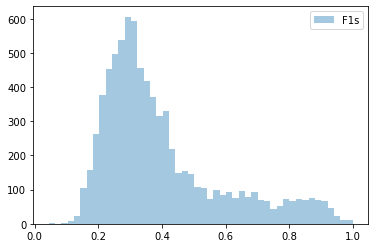

In [450]:
#sns.distplot(flat_F1s, kde=False, label="flat_F1s")
sns.distplot(F1s, kde=False, label="F1s")
plt.legend()

0
200
400
600
800
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
1000
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
1200
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
1400
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
1600
1800
2000
2200
2400
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
2600
2800
3000
3200
3400
3600
3800
4000
4200
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
4400
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
4600
4800
5000
5200
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
5400
5600
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
5800
6000
6200
6400
6600
6800
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
4280dbae-7fda-41f5-aad0-a23bbb5a36a6
7000
7200
7400
7600
7800
7910


/home/yingshac/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


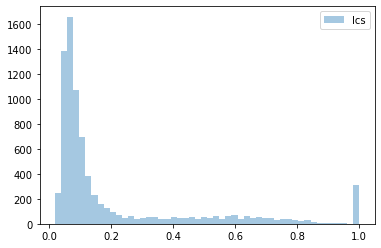

In [451]:
### find distractors super similar to gold (by lcs)
import pylcs
flat_lcs = []
lcs = []
indx2posneglcs = defaultdict(lambda: [])
for k in txt_dataset:
    if int(k) % 200 == 0: print(k)
    #guid = str(txt_dataset[k]['Guid'])
    for pos in txt_dataset[k]['SupportingFacts']:
        for neg in txt_dataset[k]['DistractorFacts']:
            overlap_ratio = pylcs.lcs2(neg['fact'], pos['fact']) / len(pos['fact'])
            flat_lcs.append(overlap_ratio)
            indx2posneglcs[k].append(overlap_ratio)
    if len(indx2posneglcs[k]): lcs.append(max(indx2posneglcs[k]))
    else: print(k)

print(len(lcs))
#sns.distplot(overlap_ratio_list, kde=False, label="PR")
sns.distplot(lcs, kde=False, label="lcs")
plt.legend()

/home/yingshac/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


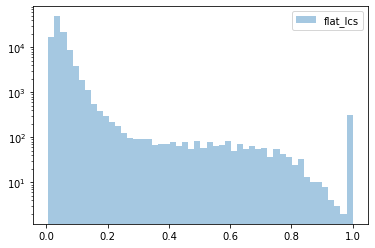

In [455]:
sns.distplot(flat_lcs, kde=False, label="flat_lcs")
plt.legend()
plt.yscale('log')

854 950
[('1261', 4), ('1916', 3), ('3173', 3), ('4565', 3), ('5343', 3)]


/home/yingshac/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


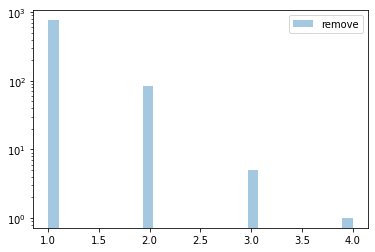

In [481]:
remove = []
for k in indx2posneglcs:
    if len(indx2posneglcs[k]):
        for x in indx2posneglcs[k]:
            if x > 0.6:
                remove.append(k)
print(len(set(remove)), len(remove))
print(Counter(remove).most_common(5))
sns.distplot(list(Counter(remove).values()), kde=False, label="remove")
plt.legend()
plt.yscale('log')

46
115
283
368
375
398
399
448
461
619
643
718
817
867
915
930
944
1034
1051
1076
1086
1213
1261
1310
1322
1345
1425
1438
1889
1916
1972
2208
2291
2366
2450
2458
2552
2630
2719
2781
2812
2927
2955
2978
3027
3035
3051
3063
3080
3408
3435
3517
3658
3729
3908
4097
4100
4208
4236
4272
4301
4339
4454
4496
4695
4717
4862
4922
5164
5199
5255
5267
5282
5304
5316
5339
5398
5423
5437
5459
5470
5519
5559
5722
5723
5813
5928
5978
6057
6112
6138
6184
6218
6460
6687
6776
6839
6867
6885
7276
7277
7359
7504
7666
7755
7768
7773
7889


/home/yingshac/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


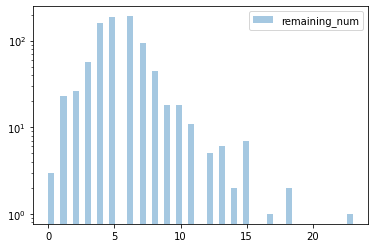

In [471]:
c = Counter(remove)
remaining_num = []
for k in txt_dataset:
    if k in c:
        remaining_num.append(len(txt_dataset[k]['DistractorFacts']) - c[k])
        if remaining_num[-1] < 4:
            print(k)
sns.distplot(remaining_num, kde=False, label="remaining_num")
plt.legend()
plt.yscale('log')

In [462]:
count = 0
for k in indx2posneglcs:
    if len(indx2posneglcs[k]) and max(indx2posneglcs[k]) > 0.6:# and max(indx2posneglcs[k]) < 0.8:
        
        count += 1
        if random.random() < 0.01:
            print(" ------------------------------- ")
            print(k)
            print(indx2posnegsim[k])
print(count)

 ------------------------------- 
288
[0.18643570108086097, 0.21666167928147242, 0.12799500051527987, 0.17599500046202324, 0.2276372795068726, 0.9064698639057801, 0.1745981747463523, 0.062495488606916186, 0.13674716651858443, 0.2764177672923942, 0.15093857437974062, 0.10434287206885656, 0.13114254654871393, 0.16215725361826885, 0.12280207314459882, 0.17646561540830108, 0.08332843995749728, 0.22448492930167183, 0.11650006240843619, 0.19416996524221702, 0.11880705832733522, 0.27349972101960096, 0.1538413777370349, 0.054049112942580316, 0.08420562023044235, 0.3168268601851729, 0.1904711934417554, 0.08601657560916133, 0.09999516223405111, 0.06741076163374923, 0.15216897227762374, 0.08771469245483303]
 ------------------------------- 
1943
[0.27082841154777737, 0.5405355442390234, 0.6526266726130622, 0.1052581719813272, 0.1884010335167891, 0.15841086575770674, 0.16841614640331398, 0.16867015253943413, 0.17856767865017692, 0.16901091852786423, 0.5090871140778769, 0.05405098629537242, 0.08163